In [1]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import pandas as pd
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.api as sm
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix


import statsmodels.api as sm


In [2]:
data = pd.read_csv('final_with_covid_AS.csv')


In [3]:
data.shape

(54038, 58)

# car driver

In [4]:
filtered_data = data[data['CarDriver'] == 1]
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12582 entries, 11 to 54025
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       12582 non-null  int64  
 1   BedDys           12582 non-null  int64  
 2   BeddystoCC       12582 non-null  float64
 3   Severity         12582 non-null  int64  
 4   DiedCases        12582 non-null  int64  
 5   DiedBdDys        12582 non-null  int64  
 6   Hsptlsns         12582 non-null  int64  
 7   April            12582 non-null  int64  
 8   August           12582 non-null  int64  
 9   December         12582 non-null  int64  
 10  February         12582 non-null  int64  
 11  January          12582 non-null  int64  
 12  July             12582 non-null  int64  
 13  June             12582 non-null  int64  
 14  March            12582 non-null  int64  
 15  May              12582 non-null  int64  
 16  November         12582 non-null  int64  
 17  October    

In [5]:
target = filtered_data['Hsptlsns'].shift(-1)

In [6]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd


X = filtered_data[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]




x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 6.292951084013619
MAE: 3.6977230501928515
R^2: 0.8154530814168719


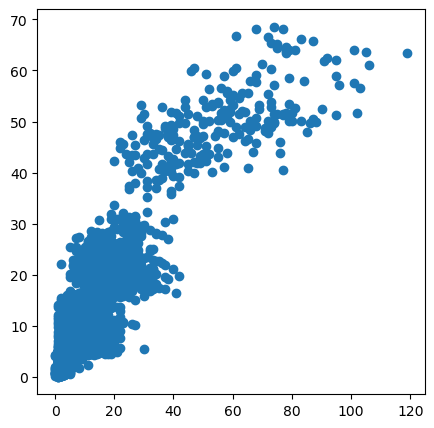

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

In [8]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 4.781255935600096
MAE: 3.065589974839281
R^2: 0.7464137281415373


In [9]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
Nmse_values = []
ioa_values = []
r2_values = []
aic_values=[]
bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)




x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


RMSE: 4.781255935600096
MAE: 3.065589974839281
R^2: 0.7464137281415373
NMSE score: 0.3460120844822917
Index of Agreement: 0.92
AIC: 11526.239643820203
BIC: 11780.619978964327


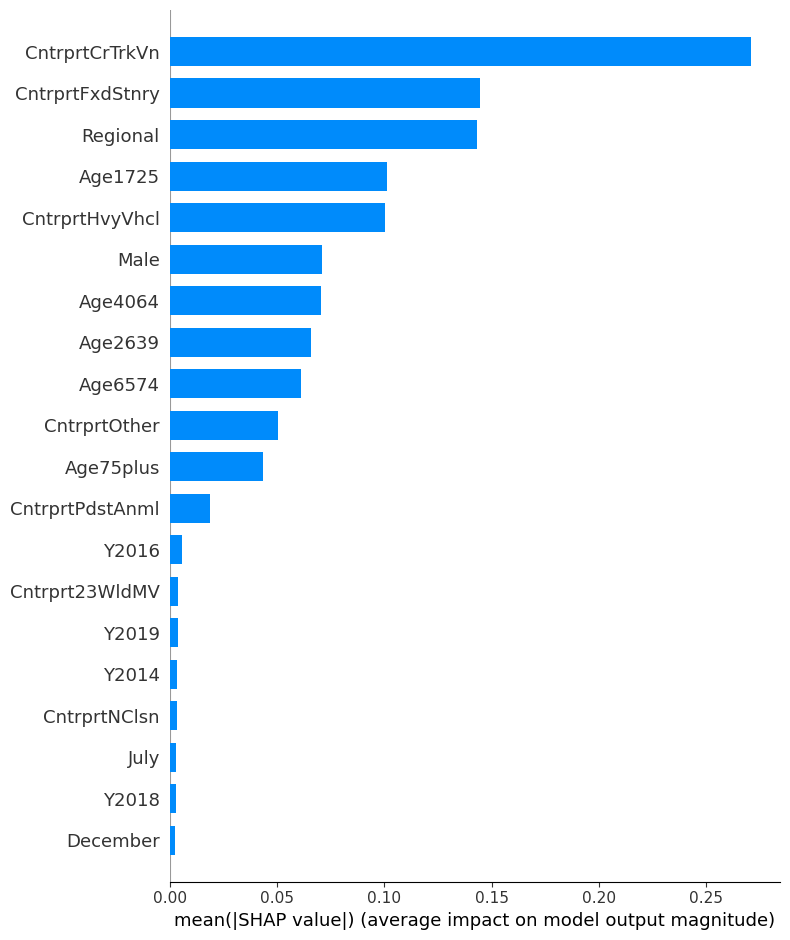

In [10]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


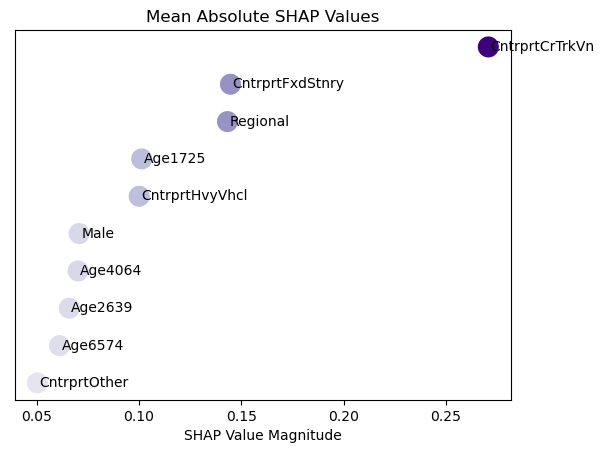

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

mean_shap_values = np.abs(shap_values).mean(axis=0)

sorted_indices = np.argsort(mean_shap_values)

cmap = plt.get_cmap('Purples')
norm = plt.Normalize(mean_shap_values[sorted_indices].min(), mean_shap_values[sorted_indices].max())
colors = [cmap(norm(value)) for value in mean_shap_values[sorted_indices]]

#plt.figure(figsize=(15, 10))

top_features_indices = sorted_indices[-10:]  
plt.scatter(mean_shap_values[top_features_indices], range(len(top_features_indices)), color=colors[-10:], s=200)

for i, txt in enumerate([x_train.columns[i] for i in top_features_indices]):
    plt.text(mean_shap_values[top_features_indices][i] + 0.001, i, txt, va='center', ha='left')

plt.xlabel('SHAP Value Magnitude')
plt.title('Mean Absolute SHAP Values')

plt.yticks([])

plt.show()

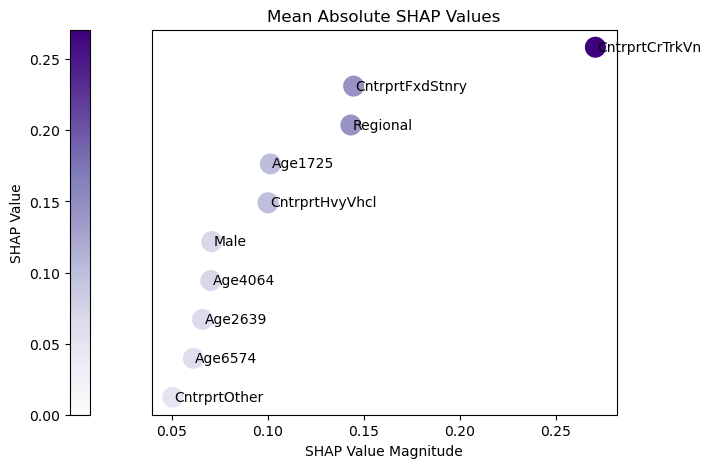

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

mean_shap_values = np.abs(shap_values).mean(axis=0)

sorted_indices = np.argsort(mean_shap_values)

cmap = plt.get_cmap('Purples')
norm = plt.Normalize(mean_shap_values[sorted_indices].min(), mean_shap_values[sorted_indices].max())
colors = [cmap(norm(value)) for value in mean_shap_values[sorted_indices]]

fig, ax = plt.subplots(figsize=(8, 5))

top_features_indices = sorted_indices[-10:]  
scatter = ax.scatter(mean_shap_values[top_features_indices], range(len(top_features_indices)), color=colors[-10:], s=200)

for i, txt in enumerate([x_train.columns[i] for i in top_features_indices]):
    ax.text(mean_shap_values[top_features_indices][i] + 0.001, i, txt, va='center', ha='left')

ax.set_xlabel('SHAP Value Magnitude')
ax.set_title('Mean Absolute SHAP Values')

ax.set_yticks([])

# Add color bar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax,location='left')
cbar.set_label('SHAP Value')

plt.show()


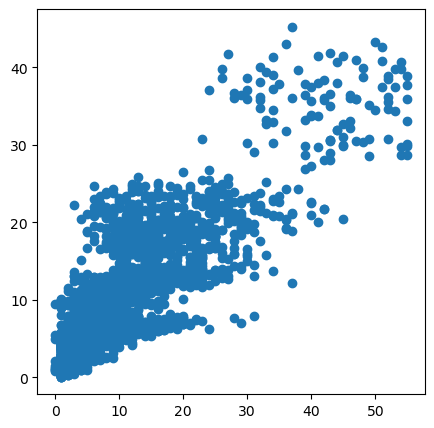

In [29]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

In [30]:
count_zeros = pd.Series(y).value_counts().get(0, 0)

print("تعداد صفرها در y:", count_zeros)

تعداد صفرها در y: 28


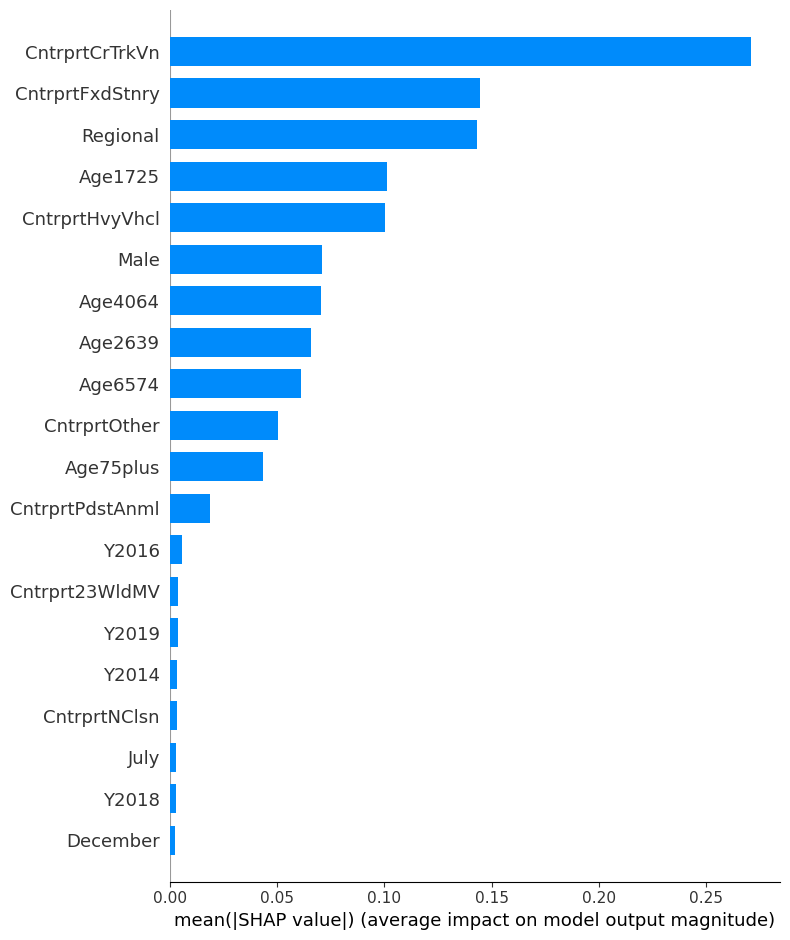

In [31]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


                         Feature  Mean SHAP Value
CntrprtCrTrkVn    CntrprtCrTrkVn         0.270712
CntrprtFxdStnry  CntrprtFxdStnry         0.144741
Regional                Regional         0.143289
Age1725                  Age1725         0.101383
CntrprtHvyVhcl    CntrprtHvyVhcl         0.100159
Male                        Male         0.070807
Age4064                  Age4064         0.070325
Age2639                  Age2639         0.066025
Age6574                  Age6574         0.061197
CntrprtOther        CntrprtOther         0.050433


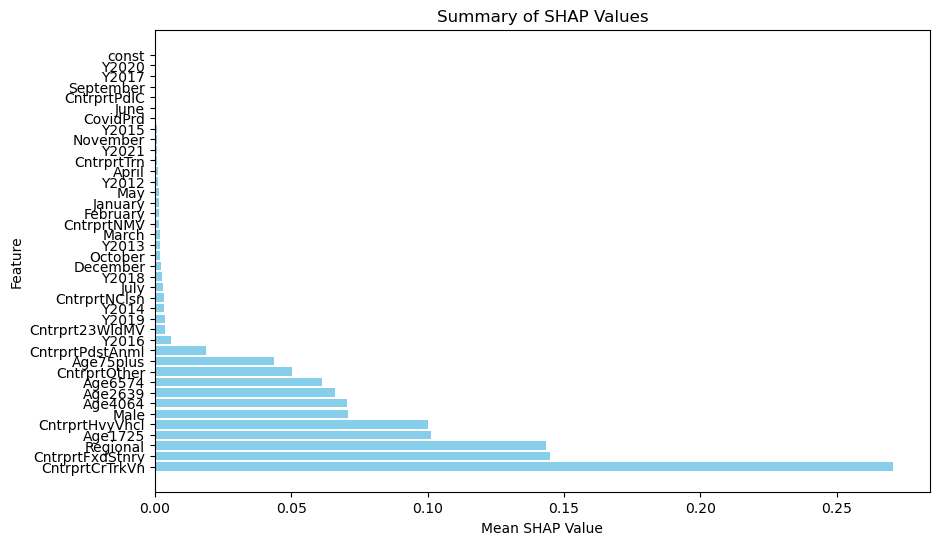

In [32]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:10])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


# car passanger

In [33]:
filtered_data2 = data[data['CarPngr'] == 1]

In [34]:
target = filtered_data2['Hsptlsns'].shift(-1)

In [35]:

X = filtered_data2[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]




x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


AttributeError: 'ScalarMappable' object has no attribute 'add_constant'

ValueError: x and y must be the same size

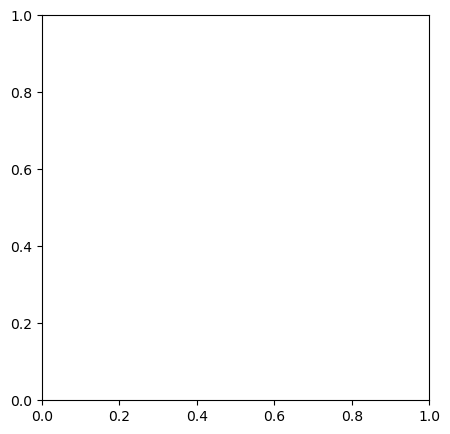

In [36]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

In [37]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


AttributeError: 'ScalarMappable' object has no attribute 'add_constant'

In [38]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
#Nmse_values = []
#ioa_values = []
#r2_values = []
#aic_values=[]
#bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)




x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


RMSE: 2.3703352505552124
MAE: 1.6507106932740951
R^2: 0.523903074222879
NMSE score: 0.4205514729205415
Index of Agreement: 0.82
AIC: 6040.368793011876
BIC: 6292.383864152212


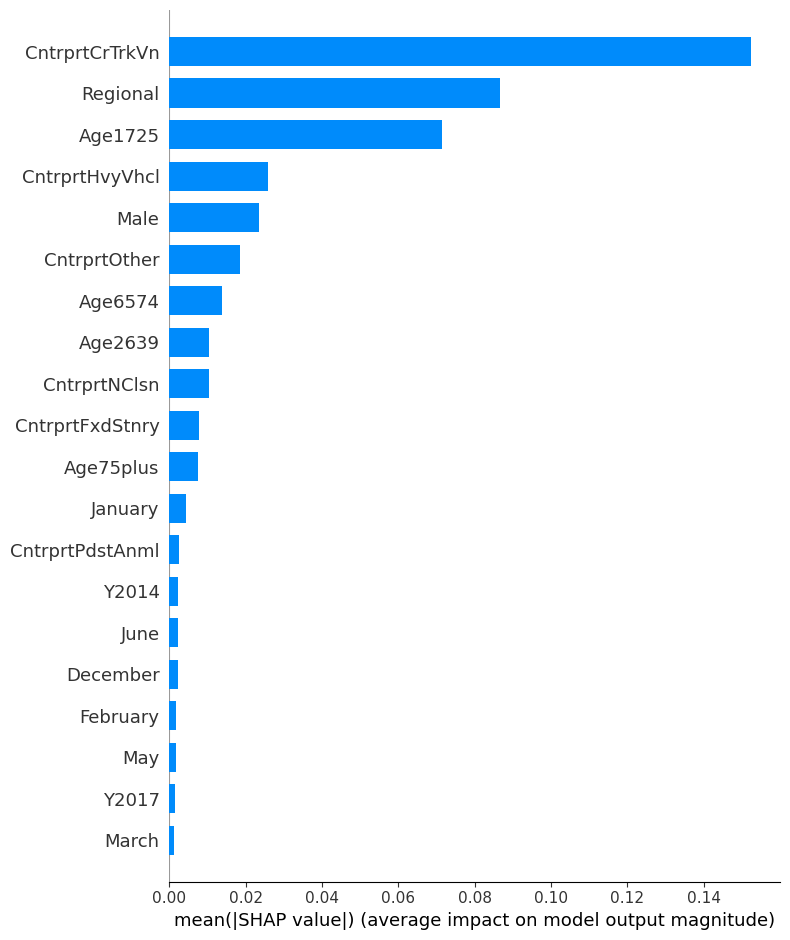

In [39]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


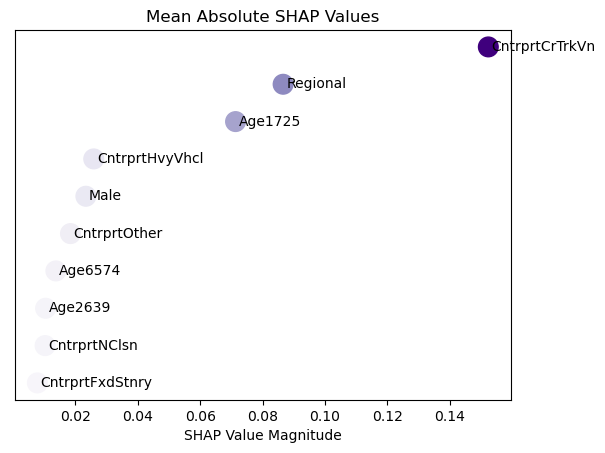

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

mean_shap_values = np.abs(shap_values).mean(axis=0)

sorted_indices = np.argsort(mean_shap_values)

cmap = plt.get_cmap('Purples')
norm = plt.Normalize(mean_shap_values[sorted_indices].min(), mean_shap_values[sorted_indices].max())
colors = [cmap(norm(value)) for value in mean_shap_values[sorted_indices]]

#plt.figure(figsize=(15, 10))

top_features_indices = sorted_indices[-10:]  
plt.scatter(mean_shap_values[top_features_indices], range(len(top_features_indices)), color=colors[-10:], s=200)

for i, txt in enumerate([x_train.columns[i] for i in top_features_indices]):
    plt.text(mean_shap_values[top_features_indices][i] + 0.001, i, txt, va='center', ha='left')

plt.xlabel('SHAP Value Magnitude')
plt.title('Mean Absolute SHAP Values')

plt.yticks([])

plt.show()

                         Feature  Mean SHAP Value
CntrprtCrTrkVn    CntrprtCrTrkVn         0.152356
Regional                Regional         0.086593
Age1725                  Age1725         0.071353
CntrprtHvyVhcl    CntrprtHvyVhcl         0.025897
Male                        Male         0.023380
CntrprtOther        CntrprtOther         0.018449
Age6574                  Age6574         0.013763
Age2639                  Age2639         0.010475
CntrprtNClsn        CntrprtNClsn         0.010316
CntrprtFxdStnry  CntrprtFxdStnry         0.007842


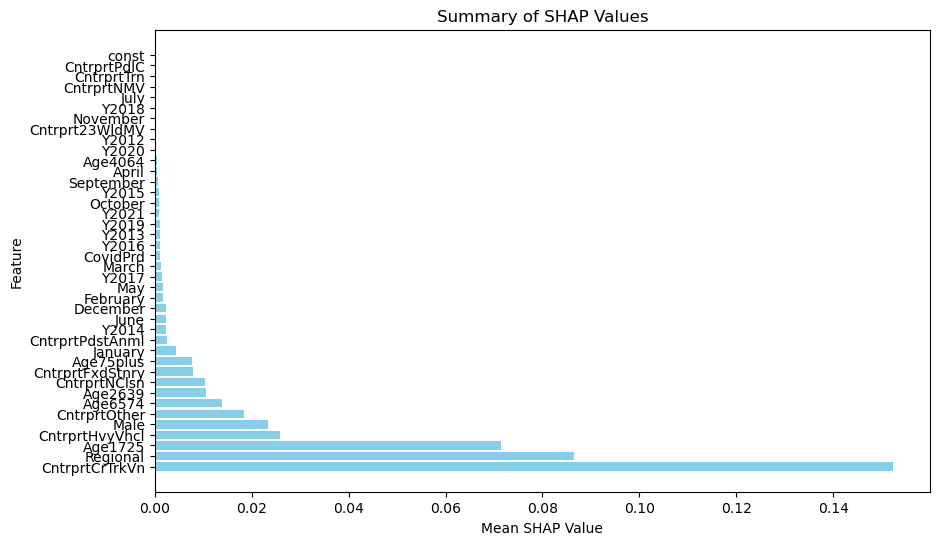

In [41]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:10])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


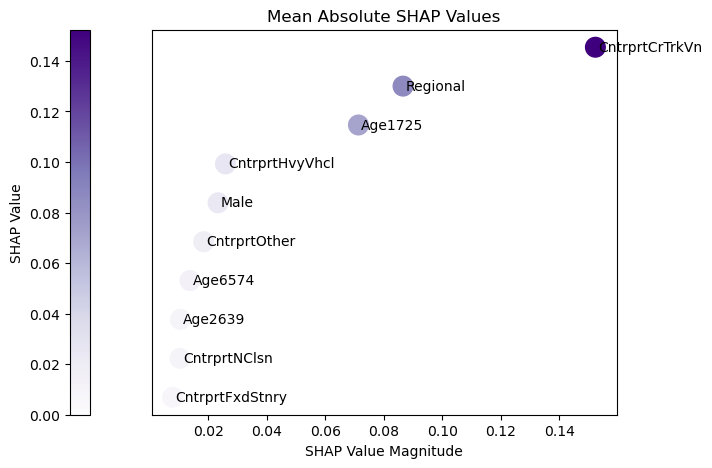

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

mean_shap_values = np.abs(shap_values).mean(axis=0)

sorted_indices = np.argsort(mean_shap_values)

cmap = plt.get_cmap('Purples')
norm = plt.Normalize(mean_shap_values[sorted_indices].min(), mean_shap_values[sorted_indices].max())
colors = [cmap(norm(value)) for value in mean_shap_values[sorted_indices]]

fig, ax = plt.subplots(figsize=(8, 5))

top_features_indices = sorted_indices[-10:]  
scatter = ax.scatter(mean_shap_values[top_features_indices], range(len(top_features_indices)), color=colors[-10:], s=200)

for i, txt in enumerate([x_train.columns[i] for i in top_features_indices]):
    ax.text(mean_shap_values[top_features_indices][i] + 0.001, i, txt, va='center', ha='left')

ax.set_xlabel('SHAP Value Magnitude')
ax.set_title('Mean Absolute SHAP Values')

ax.set_yticks([])

# Add color bar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax,location='left')
cbar.set_label('SHAP Value')

plt.show()


# Mtrcyclist REGRESION

In [43]:
filtered_data3 = data[data['Mtrcyclist'] == 1]
filtered_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11227 entries, 3 to 54034
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       11227 non-null  int64  
 1   BedDys           11227 non-null  int64  
 2   BeddystoCC       11227 non-null  float64
 3   Severity         11227 non-null  int64  
 4   DiedCases        11227 non-null  int64  
 5   DiedBdDys        11227 non-null  int64  
 6   Hsptlsns         11227 non-null  int64  
 7   April            11227 non-null  int64  
 8   August           11227 non-null  int64  
 9   December         11227 non-null  int64  
 10  February         11227 non-null  int64  
 11  January          11227 non-null  int64  
 12  July             11227 non-null  int64  
 13  June             11227 non-null  int64  
 14  March            11227 non-null  int64  
 15  May              11227 non-null  int64  
 16  November         11227 non-null  int64  
 17  October     

In [44]:
target = filtered_data3['Hsptlsns'].shift(-1)

In [45]:

X = filtered_data3[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


AttributeError: 'ScalarMappable' object has no attribute 'add_constant'

In [46]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


AttributeError: 'ScalarMappable' object has no attribute 'add_constant'

In [47]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
#Nmse_values = []
#ioa_values = []
#r2_values = []
#aic_values=[]
#bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)




x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


RMSE: 3.5747662230401316
MAE: 2.238745102476878
R^2: 0.8349106995625302
NMSE score: 0.30643169432917866
Index of Agreement: 0.95
AIC: 8387.82657766985
BIC: 8637.49535911864


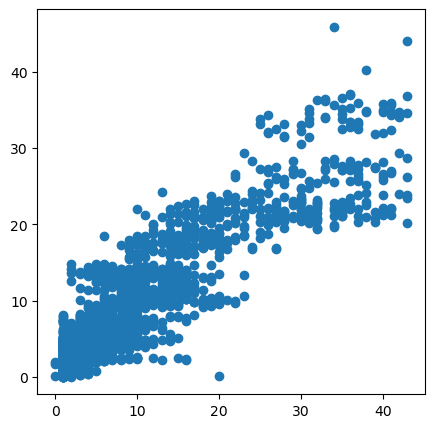

In [48]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

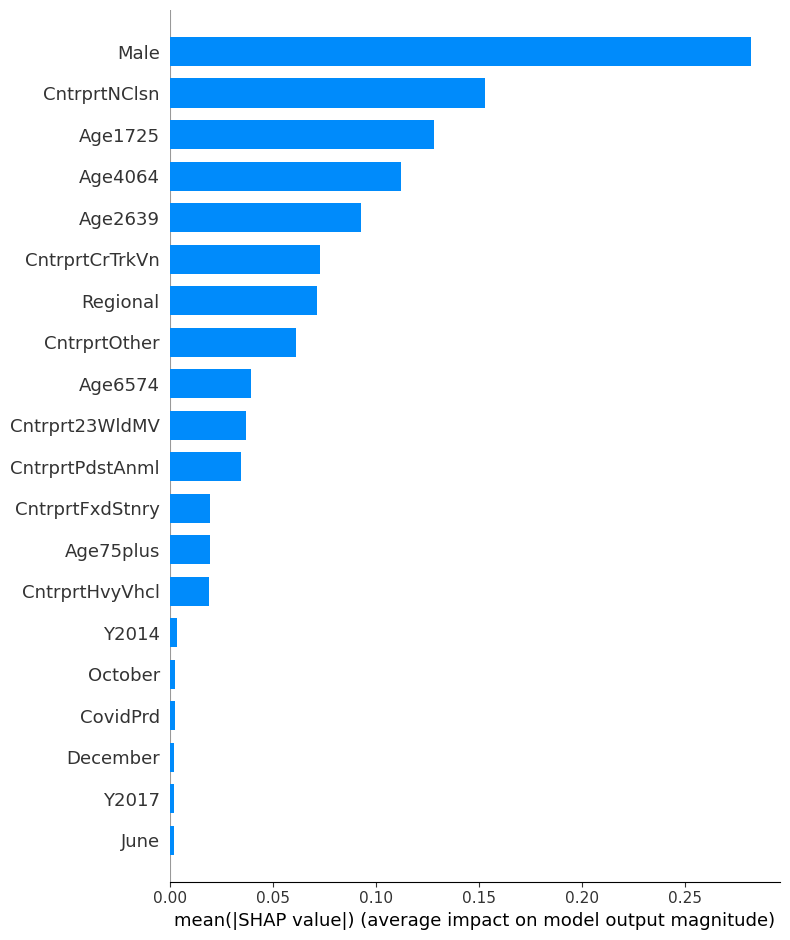

In [49]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


                       Feature  Mean SHAP Value
Male                      Male         0.281891
CntrprtNClsn      CntrprtNClsn         0.152792
Age1725                Age1725         0.128382
Age4064                Age4064         0.112246
Age2639                Age2639         0.092633
CntrprtCrTrkVn  CntrprtCrTrkVn         0.072944
Regional              Regional         0.071596
CntrprtOther      CntrprtOther         0.061132
Age6574                Age6574         0.039550
Cntrprt23WldMV  Cntrprt23WldMV         0.037248


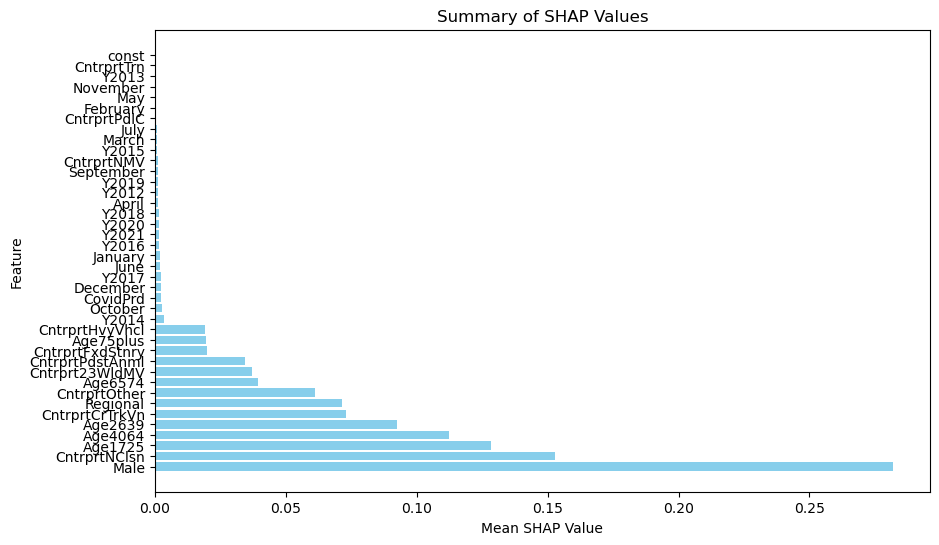

In [50]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:10])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


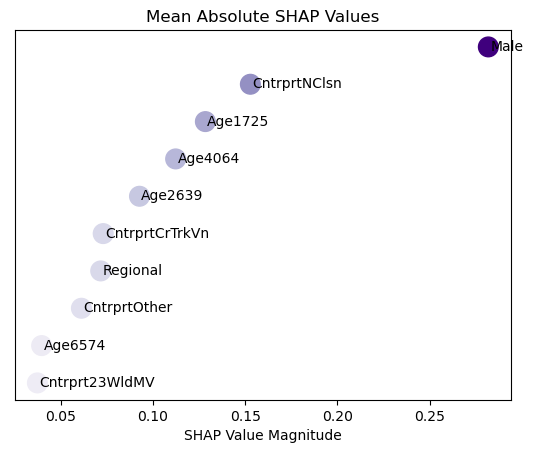

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

mean_shap_values = np.abs(shap_values).mean(axis=0)

sorted_indices = np.argsort(mean_shap_values)

cmap = plt.get_cmap('Purples')
norm = plt.Normalize(mean_shap_values[sorted_indices].min(), mean_shap_values[sorted_indices].max())
colors = [cmap(norm(value)) for value in mean_shap_values[sorted_indices]]

#plt.figure(figsize=(15, 10))

top_features_indices = sorted_indices[-10:]  
plt.scatter(mean_shap_values[top_features_indices], range(len(top_features_indices)), color=colors[-10:], s=200)

for i, txt in enumerate([x_train.columns[i] for i in top_features_indices]):
    plt.text(mean_shap_values[top_features_indices][i] + 0.001, i, txt, va='center', ha='left')

plt.xlabel('SHAP Value Magnitude')
plt.title('Mean Absolute SHAP Values')

plt.yticks([])

plt.show()

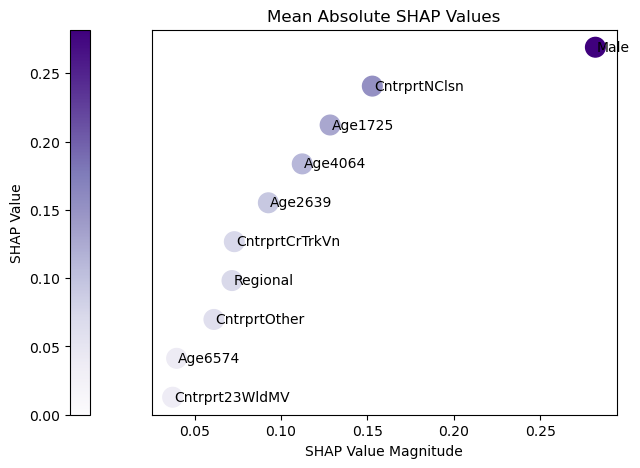

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

mean_shap_values = np.abs(shap_values).mean(axis=0)

sorted_indices = np.argsort(mean_shap_values)

cmap = plt.get_cmap('Purples')
norm = plt.Normalize(mean_shap_values[sorted_indices].min(), mean_shap_values[sorted_indices].max())
colors = [cmap(norm(value)) for value in mean_shap_values[sorted_indices]]

fig, ax = plt.subplots(figsize=(8, 5))

top_features_indices = sorted_indices[-10:]  
scatter = ax.scatter(mean_shap_values[top_features_indices], range(len(top_features_indices)), color=colors[-10:], s=200)

for i, txt in enumerate([x_train.columns[i] for i in top_features_indices]):
    ax.text(mean_shap_values[top_features_indices][i] + 0.001, i, txt, va='center', ha='left')

ax.set_xlabel('SHAP Value Magnitude')
ax.set_title('Mean Absolute SHAP Values')

ax.set_yticks([])

# Add color bar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax,location='left')
cbar.set_label('SHAP Value')

plt.show()


# Pedal cyclist Regrasion

In [53]:
filtered_data4 = data[data['PdlCyclist'] == 1]
target = filtered_data4['Hsptlsns'].shift(-1)

X = filtered_data4[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


AttributeError: 'ScalarMappable' object has no attribute 'add_constant'

In [54]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


AttributeError: 'ScalarMappable' object has no attribute 'add_constant'

In [55]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
#Nmse_values = []
#ioa_values = []
#r2_values = []
#aic_values=[]
#bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)




x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


RMSE: 3.0977801057070087
MAE: 2.006812134291563
R^2: 0.7010188225078884
NMSE score: 0.4194668857273545
Index of Agreement: 0.90
AIC: 8250.07393052486
BIC: 8503.946624020873


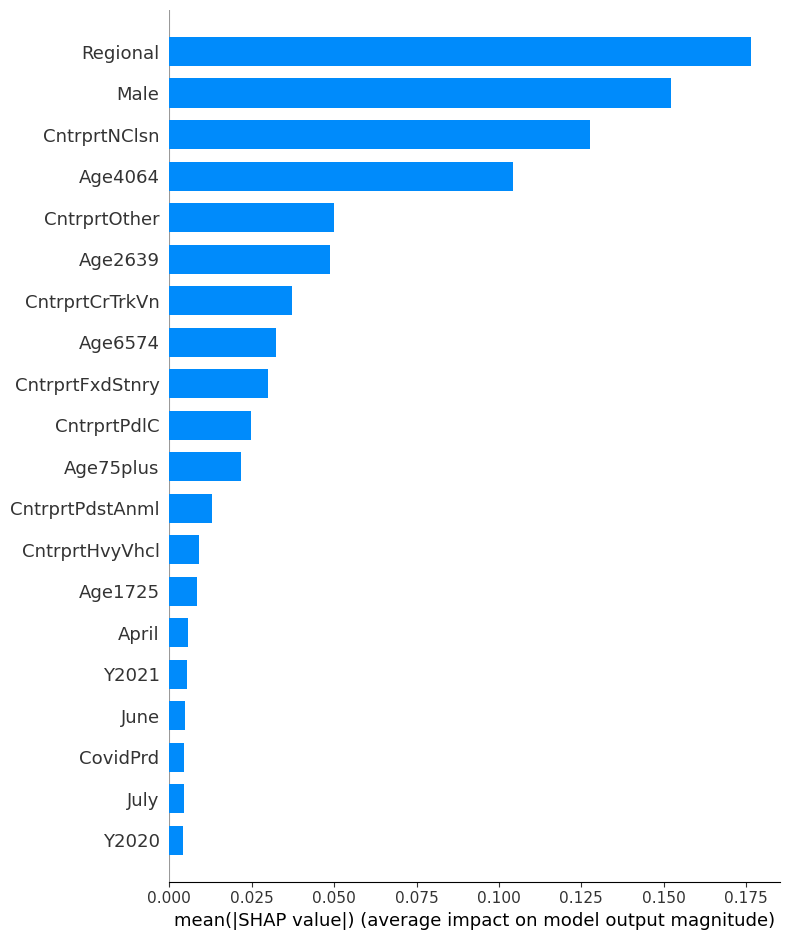

In [56]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


                         Feature  Mean SHAP Value
Regional                Regional         0.176445
Male                        Male         0.152134
CntrprtNClsn        CntrprtNClsn         0.127491
Age4064                  Age4064         0.104233
CntrprtOther        CntrprtOther         0.050087
Age2639                  Age2639         0.048762
CntrprtCrTrkVn    CntrprtCrTrkVn         0.037348
Age6574                  Age6574         0.032475
CntrprtFxdStnry  CntrprtFxdStnry         0.029972
CntrprtPdlC          CntrprtPdlC         0.024910


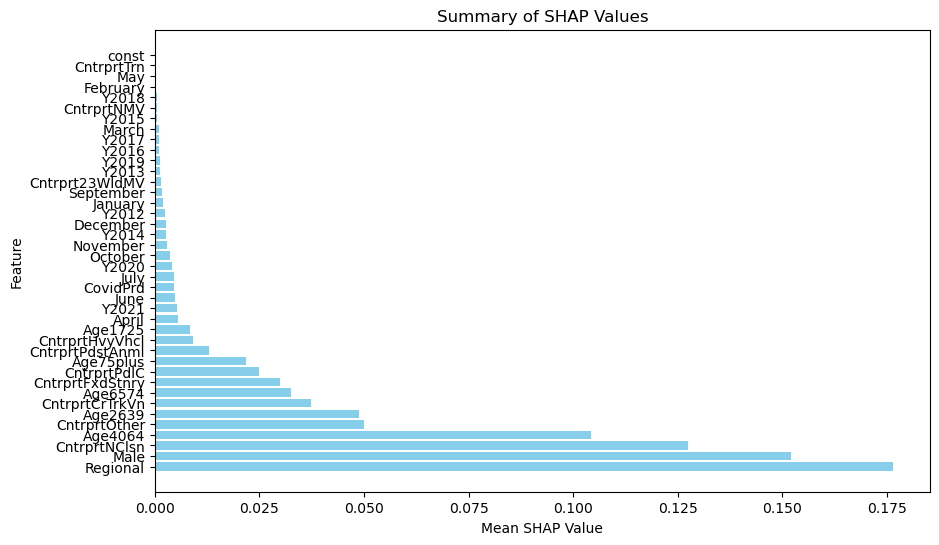

In [57]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:10])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


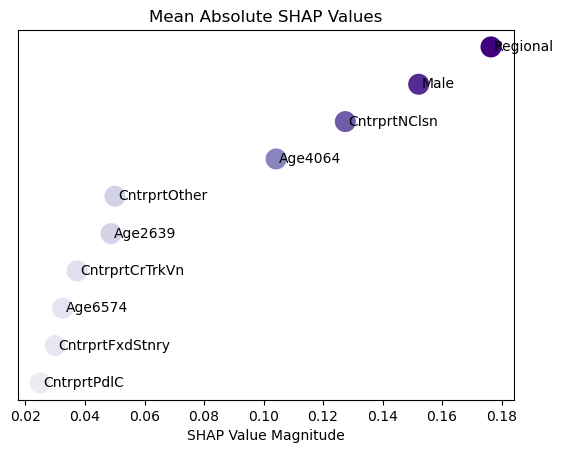

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

mean_shap_values = np.abs(shap_values).mean(axis=0)

sorted_indices = np.argsort(mean_shap_values)

cmap = plt.get_cmap('Purples')
norm = plt.Normalize(mean_shap_values[sorted_indices].min(), mean_shap_values[sorted_indices].max())
colors = [cmap(norm(value)) for value in mean_shap_values[sorted_indices]]

#plt.figure(figsize=(15, 10))

top_features_indices = sorted_indices[-10:]  
plt.scatter(mean_shap_values[top_features_indices], range(len(top_features_indices)), color=colors[-10:], s=200)

for i, txt in enumerate([x_train.columns[i] for i in top_features_indices]):
    plt.text(mean_shap_values[top_features_indices][i] + 0.001, i, txt, va='center', ha='left')

plt.xlabel('SHAP Value Magnitude')
plt.title('Mean Absolute SHAP Values')

plt.yticks([])

plt.show()

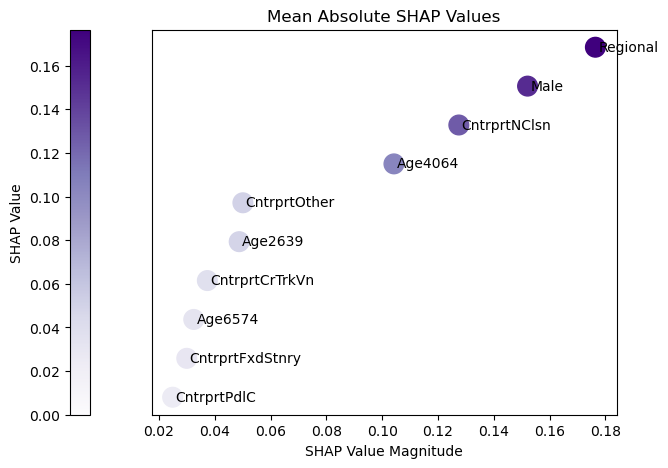

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

mean_shap_values = np.abs(shap_values).mean(axis=0)

sorted_indices = np.argsort(mean_shap_values)

cmap = plt.get_cmap('Purples')
norm = plt.Normalize(mean_shap_values[sorted_indices].min(), mean_shap_values[sorted_indices].max())
colors = [cmap(norm(value)) for value in mean_shap_values[sorted_indices]]

fig, ax = plt.subplots(figsize=(8, 5))

top_features_indices = sorted_indices[-10:]  
scatter = ax.scatter(mean_shap_values[top_features_indices], range(len(top_features_indices)), color=colors[-10:], s=200)

for i, txt in enumerate([x_train.columns[i] for i in top_features_indices]):
    ax.text(mean_shap_values[top_features_indices][i] + 0.001, i, txt, va='center', ha='left')

ax.set_xlabel('SHAP Value Magnitude')
ax.set_title('Mean Absolute SHAP Values')

ax.set_yticks([])

# Add color bar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax,location='left')
cbar.set_label('SHAP Value')

plt.show()


# Pedestrian REGRESION

In [61]:
filtered_data5 = data[data['Pedestrian'] == 1]
target = filtered_data5['Hsptlsns'].shift(-1)

In [62]:

X = filtered_data5[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


AttributeError: 'ScalarMappable' object has no attribute 'add_constant'

In [63]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
#Nmse_values = []
#ioa_values = []
#r2_values = []
#aic_values=[]
#bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)




x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


RMSE: 2.298720878946555
MAE: 1.5213823058327753
R^2: 0.7541776333618837
NMSE score: 0.3013521335084202
Index of Agreement: 0.92
AIC: 3065.152537858907
BIC: 3290.2871291938372


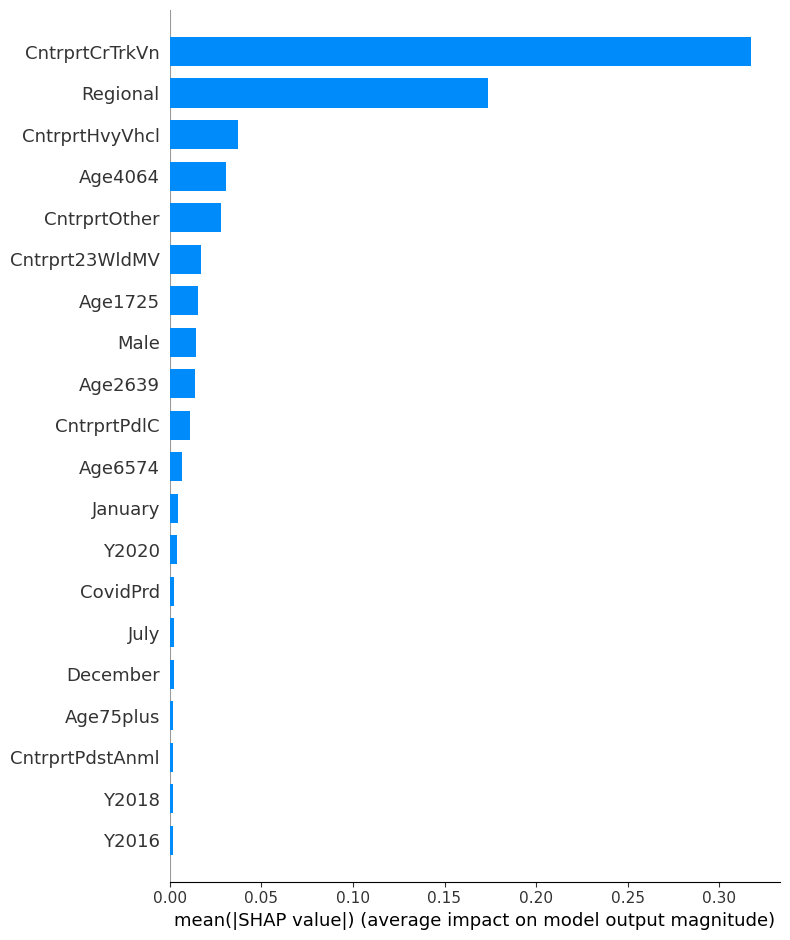

In [64]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


                       Feature  Mean SHAP Value
CntrprtCrTrkVn  CntrprtCrTrkVn         0.317153
Regional              Regional         0.173636
CntrprtHvyVhcl  CntrprtHvyVhcl         0.037052
Age4064                Age4064         0.030904
CntrprtOther      CntrprtOther         0.028147
Cntrprt23WldMV  Cntrprt23WldMV         0.017319
Age1725                Age1725         0.015267
Male                      Male         0.014661
Age2639                Age2639         0.013661
CntrprtPdlC        CntrprtPdlC         0.011222


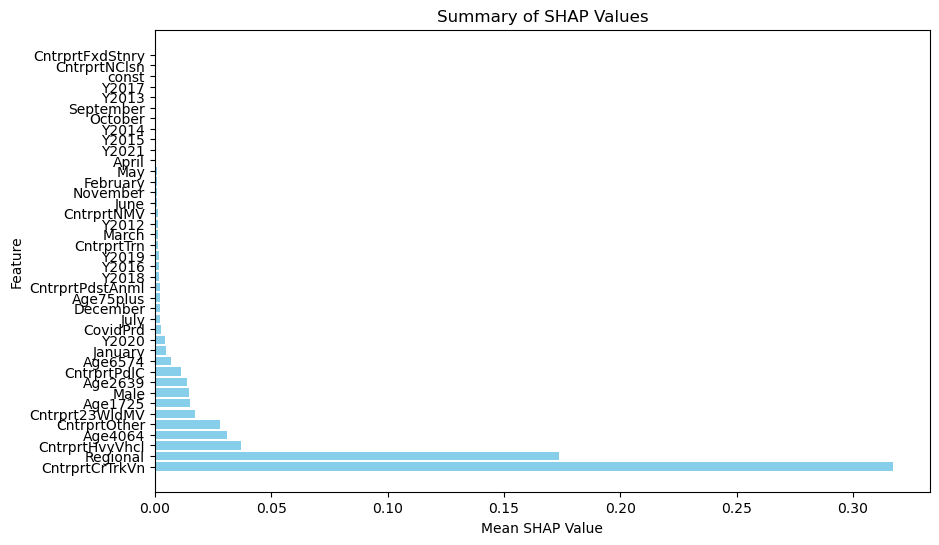

In [65]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:10])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


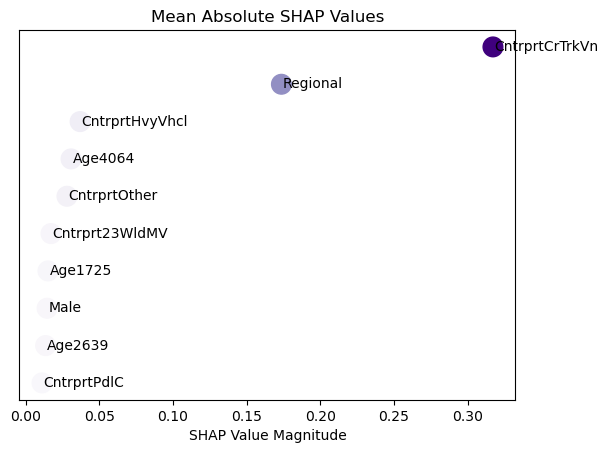

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

mean_shap_values = np.abs(shap_values).mean(axis=0)

sorted_indices = np.argsort(mean_shap_values)

cmap = plt.get_cmap('Purples')
norm = plt.Normalize(mean_shap_values[sorted_indices].min(), mean_shap_values[sorted_indices].max())
colors = [cmap(norm(value)) for value in mean_shap_values[sorted_indices]]

#plt.figure(figsize=(15, 10))

top_features_indices = sorted_indices[-10:]  
plt.scatter(mean_shap_values[top_features_indices], range(len(top_features_indices)), color=colors[-10:], s=200)

for i, txt in enumerate([x_train.columns[i] for i in top_features_indices]):
    plt.text(mean_shap_values[top_features_indices][i] + 0.001, i, txt, va='center', ha='left')

plt.xlabel('SHAP Value Magnitude')
plt.title('Mean Absolute SHAP Values')

plt.yticks([])

plt.show()

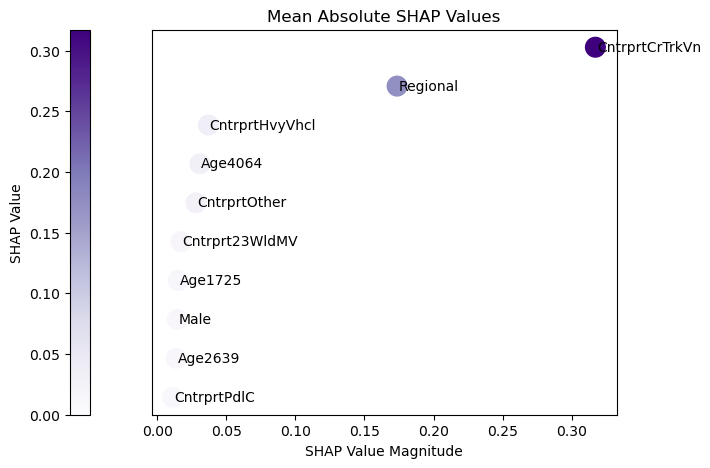

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

mean_shap_values = np.abs(shap_values).mean(axis=0)

sorted_indices = np.argsort(mean_shap_values)

cmap = plt.get_cmap('Purples')
norm = plt.Normalize(mean_shap_values[sorted_indices].min(), mean_shap_values[sorted_indices].max())
colors = [cmap(norm(value)) for value in mean_shap_values[sorted_indices]]

fig, ax = plt.subplots(figsize=(8, 5))

top_features_indices = sorted_indices[-10:]  
scatter = ax.scatter(mean_shap_values[top_features_indices], range(len(top_features_indices)), color=colors[-10:], s=200)

for i, txt in enumerate([x_train.columns[i] for i in top_features_indices]):
    ax.text(mean_shap_values[top_features_indices][i] + 0.001, i, txt, va='center', ha='left')

ax.set_xlabel('SHAP Value Magnitude')
ax.set_title('Mean Absolute SHAP Values')

ax.set_yticks([])

# Add color bar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax,location='left')
cbar.set_label('SHAP Value')

plt.show()


In [42]:
Nmse_values

[0.3460120844822917,
 0.4205514729205415,
 0.30643169432917866,
 0.4194668857273545,
 0.3013521335084202]

In [43]:
ioa_values

[0.9206913588449971,
 0.8188288161727011,
 0.9497701903179597,
 0.8992415599426788,
 0.9231752265514138]

In [44]:
r2_values

[0.7464137281415373,
 0.523903074222879,
 0.8349106995625302,
 0.7010188225078884,
 0.7541776333618837]

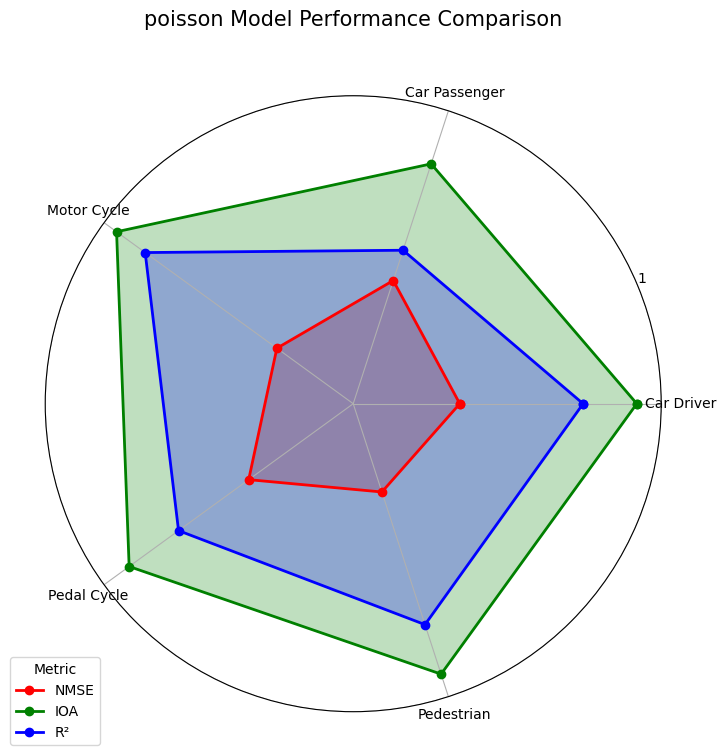

In [45]:
import matplotlib.pyplot as plt
import numpy as np

nmse_values = [0.3460120844822917,
 0.4205514729205415,
 0.30643169432917866,
 0.4194668857273545,
 0.3013521335084202]


ioa_values = [0.9206913588449971,
 0.8188288161727011,
 0.9497701903179597,
 0.8992415599426788,
 0.9231752265514138]

r2_values =[0.7464137281415373,
 0.523903074222879,
 0.8349106995625302,
 0.7010188225078884,
 0.7541776333618837]

labels = ['Car Driver', 'Car Passenger', 'Motor Cycle', 'Pedal Cycle', 'Pedestrian']

data = np.array([nmse_values, ioa_values, r2_values])

num_vars = data.shape[1]

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

colors = ['red', 'green', 'blue']
labels_metric = ['NMSE', 'IOA', 'R²']

for idx, (data_slice, color, label) in enumerate(zip(data, colors, labels_metric)):
    if label == 'MAE':
        alpha_value = 0.5  
    else:
        alpha_value = 0.25 
    data_slice = np.concatenate([data_slice, [data_slice[0]]])  
    ax.plot(angles, data_slice, 'o-', linewidth=2, label=label, color=color)
    ax.fill(angles, data_slice, alpha=alpha_value, color=color)

ax.set_xticks(angles[:-1])  
ax.set_xticklabels(labels)
ax.set_yticks([1, 2, 3, 4, 5])  
ax.set_yticklabels(['1', '2', '3', '4', '5'])

plt.title('poisson Model Performance Comparison', size=15, color='black', y=1.1)
plt.legend(title='Metric', loc='upper right', bbox_to_anchor=(0.1, 0.1))
ax.set_ylim(0, 1)

plt.show()


In [46]:


average_bic = sum(bic_values) / len(bic_values)

# چاپ میانگین AIC
print(" BIC:", average_bic)


average_aic = sum(aic_values) / len(aic_values)

# چاپ میانگین AIC
print(" AIC:", average_aic)


 BIC: 7700.946591089977
 AIC: 7453.93229657714


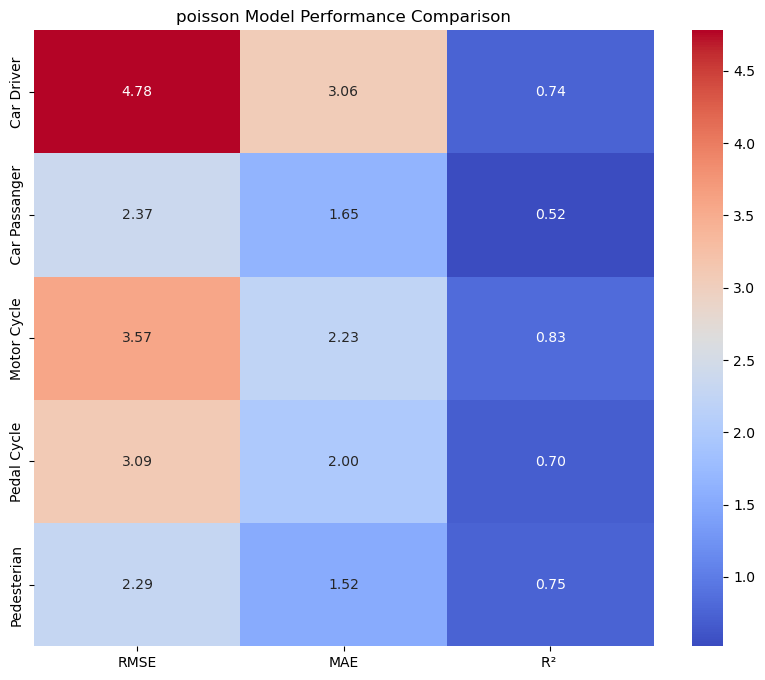

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# فرض کنید که مقادیر MSE، MAE و R² برای هر پنج مدل را دارید
mse_values = [4.78, 2.37, 3.57, 3.09, 2.29]
mae_values = [3.06, 1.65,2.23,2.00, 1.52]
r2_values = [0.74, 0.52,0.83,0.7  ,0.75]

# ایجاد داده‌ها برای هیت مپ
metrics = ['Car Driver', ' Car Passanger ', 'Motor Cycle', 'Pedal Cycle', 'Pedesterian']
models = ['RMSE', 'MAE', 'R² ']
data = np.array([mse_values, mae_values, r2_values]).T
#metrics
# ایجاد هیت مپ
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(data, annot=True, fmt='.2f', xticklabels=models, yticklabels=metrics, cmap='coolwarm')
heatmap.set_title('poisson Model Performance Comparison')

plt.show()

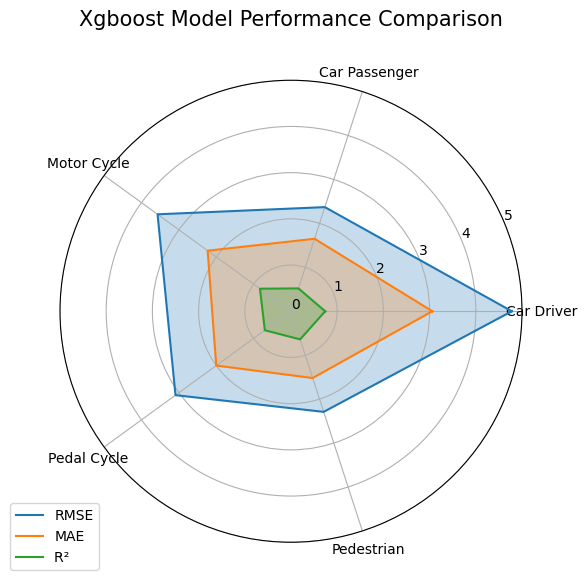

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# مقادیر MSE، MAE و R² برای هر پنج مدل
mse_values = [4.78, 2.37, 3.57, 3.09, 2.29]
mae_values = [3.06, 1.65, 2.23, 2.00, 1.52]
r2_values = [0.74, 0.52, 0.83, 0.70, 0.64]

# نام مدل‌ها
labels = np.array(['Car Driver', 'Car Passenger', 'Motor Cycle', 'Pedal Cycle', 'Pedestrian'])

# ترکیب داده‌ها در یک آرایه
data = np.array([mse_values, mae_values, r2_values])

# ایجاد یک نمودار اسپایدر برای هر معیار
num_vars = data.shape[1]
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
data = np.concatenate((data, data[:,[0]]), axis=1)  # بستن دایره
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# رسم خطوط برای هر مدل
for idx in range(len(data)):
    ax.fill(angles, data[idx], alpha=0.25)
    ax.plot(angles, data[idx], label=models[idx])

ax.set_yticks([0, 1, 2, 3, 4, 5])
ax.set_yticklabels(['0', '1', '2', '3', '4', '5'])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title('Xgboost Model Performance Comparison', size=15, color='black', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

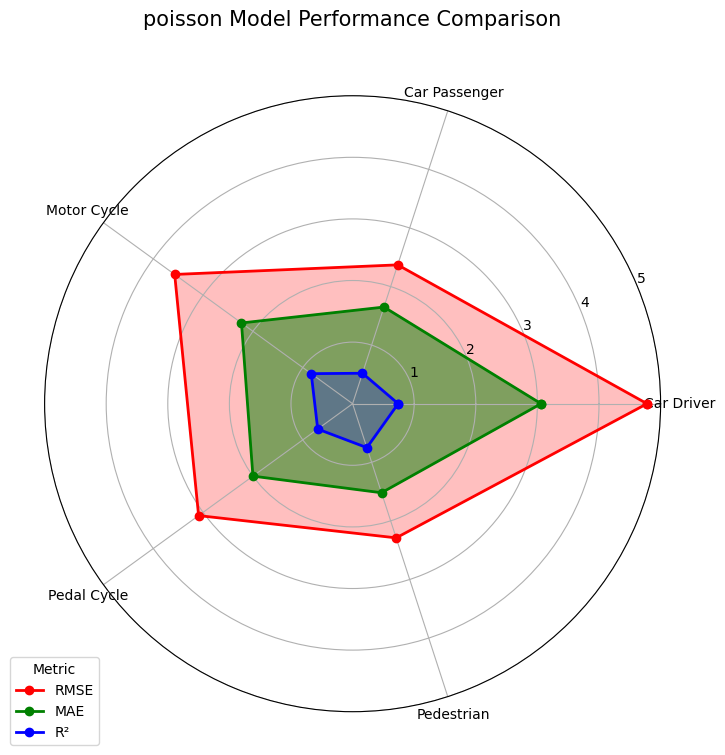

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# مقادیر MSE، MAE و R² برای هر پنج مدل
mse_values = [4.78, 2.37, 3.57, 3.09 , 2.29]
mae_values = [3.06, 1.65,2.23,2.00 , 1.52]
r2_values = [0.74, 0.52,0.83,0.7  ,0.75]

# نام مدل‌ها
labels = ['Car Driver', 'Car Passenger', 'Motor Cycle', 'Pedal Cycle', 'Pedestrian']

# ترکیب داده‌ها در یک آرایه
data = np.array([mse_values, mae_values, r2_values])

# تعداد متغیرها
num_vars = data.shape[1]

# تقسیم دایره به بخش‌های مساوی
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # بستن دایره

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# رنگ‌ها برای هر معیار
colors = ['red', 'green', 'blue']
labels_metric = ['RMSE', 'MAE', 'R²']

for idx, (data_slice, color, label) in enumerate(zip(data, colors, labels_metric)):
    if label == 'MAE':
        alpha_value = 0.5  # تنظیم شفافیت برای MAE
    else:
        alpha_value = 0.25  # تنظیم شفافیت برای سایر معیارها
    data_slice = np.concatenate([data_slice, [data_slice[0]]])  # بستن دایره
    ax.plot(angles, data_slice, 'o-', linewidth=2, label=label, color=color)
    ax.fill(angles, data_slice, alpha=alpha_value, color=color)

ax.set_xticks(angles[:-1])  # تنظیم موقعیت برچسب‌ها
ax.set_xticklabels(labels)
ax.set_yticks([1, 2, 3, 4, 5])  # تنظیم مقیاس محور y
ax.set_yticklabels(['1', '2', '3', '4', '5'])

plt.title('poisson Model Performance Comparison', size=15, color='black', y=1.1)
plt.legend(title='Metric', loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()
